### Support Vector Machines

In this chapter, we discuss the support vector machine (SVM), an approach
for classification that was developed in the computer science community in
the 1990s and that has grown in popularity since then. SVMs have been
shown to perform well in a variety of settings, and are often considered one
of the best “out of the box” classifiers.

The support vector machine is a generalization of a simple and intu
itive classifier called the maximal margin classifier, which we introduce in
Section 9.1. Though it is elegant and simple, we will see that this classifier
unfortunately cannot be applied to most data sets, since it requires that
the classes be separable by a linear boundary. In Section 9.2, we introduce
the support vector classifier, an extension of the maximal margin classifier
that can be applied in a broader range of cases. Section 9.3 introduces the
support vector machine, which is a further extension of the support vec
tor classifier in order to accommodate non-linear class boundaries. Support
vector machines are intended for the binary classification setting in which
there are two classes; in Section 9.4 we discuss extensions of support vector
machines to the case of more than two classes. In Section 9.5 we discuss
the close connections between support vector machines and other statistical
methods such as logistic regression.

People often loosely refer to the maximal margin classifier, the support
vector classifier, and the support vector machine as “support vector
machines”. To avoid confusion, we will carefully distinguish between these
three notions in this chapter.

#### Maximal Margin Classifier

In this section, we define a hyperplane and introduce the concept of an
optimal separating hyperplane.

##### What Is a Hyperplane?

In a p-dimensional space, a hyperplane is a flat affine subspace of hyperplane dimension $ p - 1 $. For instance, in two dimensions, a hyperplane is a flat one-dimensional subspace—in other words, a line. In three dimensions, a hyperplane is a flat two-dimensional subspace—that is, a plane. In $ p > 3 $ dimensions, it can be hard to visualize a hyperplane, but the notion of a $(p - 1)$-dimensional flat subspace still applies.

The mathematical definition of a hyperplane is quite simple. In two dimensions, a hyperplane is defined by the equation:

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0 \tag{9.1}
$$

for parameters $ \beta_0, \beta_1, $ and $ \beta_2 $. When we say that (9.1) “defines” the hyperplane, we mean that any $ X = (X_1, X_2)^T $ for which (9.1) holds is a point on the hyperplane. Note that (9.1) is simply the equation of a line, since indeed in two dimensions, a hyperplane is a line.

Equation (9.1) can be easily extended to the p-dimensional setting:

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p = 0 \tag{9.2}
$$

defines a p-dimensional hyperplane, again in the sense that if a point $ X = (X_1, X_2, \ldots, X_p)^T $ in p-dimensional space (i.e. a vector of length $ p $) satisfies (9.2), then $ X $ lies on the hyperplane.

Now, suppose that $ X $ does not satisfy (9.2); rather,

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p > 0. \tag{9.3}
$$

Then this tells us that $ X $ lies to one side of the hyperplane. On the other hand, if

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p < 0, \tag{9.4}
$$

then $ X $ lies on the other side of the hyperplane. So we can think of the hyperplane as dividing p-dimensional space into two halves. One can easily determine on which side of the hyperplane a point lies by simply calculating the sign of the left-hand side of (9.2). A hyperplane in two-dimensional space is shown in Figure 9.1.



##### Classification Using a Separating Hyperplane

Now suppose that we have an $ n \times p $ data matrix $ X $ that consists of $ n $ training observations in p-dimensional space:

$$
x_1 =
\begin{bmatrix}
x_{11} \\
\vdots \\
x_{1p}
\end{bmatrix}
\quad
\ldots
\quad
x_n =
\begin{bmatrix}
x_{n1} \\
\vdots \\
x_{np}
\end{bmatrix} \tag{9.5}
$$

and that these observations fall into two classes—that is, $ y_1, \ldots, y_n \in \{ -1, 1 \} $ where $ -1 $ represents one class and $ 1 $ the other class.  We also have a test observation, a $ p $-vector of observed features $ x^* = (x^*_1, \ldots, x^*_p)^T $. Our goal is to develop a classifier based on the training data that will correctly classify the test observation using its feature measurements. We have seen a number of approaches for this task, such as linear discriminant analysis and logistic regression in Chapter 4, and classification trees, bagging, and boosting in Chapter 8. We will now see a new approach that is based upon the concept of a separating hyperplane.

Suppose that it is possible to construct a hyperplane that separates the training observations perfectly according to their class labels. Examples of three such separating hyperplanes are shown in the left-hand panel of Figure 9.2. We can label the observations from the blue class as $ y_i = 1 $ and those from the purple class as $ y_i = -1 $. Then a separating hyperplane has the property that:

$$
\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} > 0 \quad \text{if } y_i = 1,
$$

and

$$
\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} < 0 \quad \text{if } y_i = -1.
$$

Equivalently, a separating hyperplane has the property that:

$$
y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) > 0
$$

for all $ i = 1, \ldots, n $.

If a separating hyperplane exists, we can use it to construct a very natural classifier: a test observation is assigned a class depending on which side of the hyperplane it is located. The right-hand panel of Figure 9.2 shows an example of such a classifier. That is, we classify the test observation $ x $ based on the sign of 

$$
f(x^*) = \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + \cdots + \beta_p x^*_p.
$$

If $ f(x^*) $ is positive, then we assign the test observation to class 1, and if $ f(x^*) $ is negative, then we assign it to class -1. We can also make use of the magnitude of $ f(x^*) $. If If $ f(x^*) $ is far from zero, then this means that $ x $ lies far from the hyperplane, and so we can be confident about our class assignment for $ x $. On the other hand, if $ f(x^*) $ is close to zero, then $ x $ is located near the hyperplane, and so we are less certain about the class assignment for $ x $. Not surprisingly, and as we see in Figure 9.2, a classifier that is based on a separating hyperplane leads to a linear decision boundary.



##### The Maximal Margin Classifier

In general, if our data can be perfectly separated using a hyperplane, then there will in fact exist an infinite number of such hyperplanes. This is because a given separating hyperplane can usually be shifted a tiny bit up or down, or rotated, without coming into contact with any of the observations. Three possible separating hyperplanes are shown in the left-hand panel of Figure 9.2. In order to construct a classifier based upon a separating hyperplane, we must have a reasonable way to decide which of the infinite possible separating hyperplanes to use.

A natural choice is the maximal margin hyperplane (also known as the maximal optimal separating hyperplane), which is the separating hyperplane that is farthest from the training observations. That is, we can compute the (perpendicular) distance from each training observation to a given separating hyperplane; the smallest such distance is the minimal distance from the observations to the hyperplane, and is known as the margin. The maximal margin hyperplane is the separating hyperplane for which the margin is largest—that is, it is the hyperplane that has the farthest minimum distance to the training observations. We can then classify a test observation based on which side of the maximal margin hyperplane it lies. This is known as the maximal margin classifier. We hope that a classifier that has a large maximal margin on the training data will also have a large margin on the test data, and hence will classify the test observations correctly. Although the maximal margin classifier is often successful, it can also lead to overfitting when $ p $ is large.

If $ \beta_0, \beta_1, \ldots, \beta_p $ are the coefficients of the maximal margin hyperplane, then the maximal margin classifier classifies the test observation $ x $ based on the sign of 

$$
f(x^*) = \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + \cdots + \beta_p x^*_p.
$$

Figure 9.3 shows the maximal margin hyperplane on the data set of Figure 9.2. Comparing the right-hand panel of Figure 9.2 to Figure 9.3, we see that the maximal margin hyperplane shown in Figure 9.3 does indeed result in a greater minimal distance between the observations and the separating hyperplane—that is, a larger margin. In a sense, the maximal margin hyperplane represents the mid-line of the widest “slab” that we can insert between the two classes.

Examining Figure 9.3, we see that three training observations are equidistant from the maximal margin hyperplane and lie along the dashed lines indicating the width of the margin. These three observations are known as support vectors, since they are vectors in $ p $-dimensional space (in Figure 9.3, $ p = 2 $) and they “support” the maximal margin hyperplane in the sense that if these points were moved slightly, then the maximal margin hyperplane would move as well. Interestingly, the maximal margin hyperplane depends directly on the support vectors, but not on the other observations: a movement to any of the other observations would not affect the separating hyperplane, provided that the observation’s movement does not cause it to cross the boundary set by the margin. The fact that the maximal margin
hyperplane depends directly on only a small subset of the observations is
an important property that will arise later in this chapter when we discuss
the support vector classifier and support vector machines.

#####  Construction of the Maximal Margin Classifier

We now consider the task of constructing the maximal margin hyperplane based on a set of $ n $ training observations $ x_1, \ldots, x_n \in \mathbb{R}^p $ and associated class labels $ y_1, \ldots, y_n \in \{ -1, 1 \} $. Briefly, the maximal margin hyperplane is the solution to the optimization problem

$$
\begin{aligned}
& \text{maximize} \quad M \\
& \text{subject to} \\
& \sum_{j=1}^{p} \beta_j^2 = 1, \quad (9.10)\\
& y_i \left( \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} \right) \geq M \quad \text{for } i = 1, \ldots, n. \quad (9.11)
\end{aligned}
$$

This optimization problem (9.9)–(9.11) is actually simpler than it looks. First of all, the constraint in (9.11) that 

$$
y_i \left( \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} \right) \geq M \quad \text{for } i = 1, \ldots, n
$$

guarantees that each observation will be on the correct side of the hyperplane, provided that $ M $ is positive. (Actually, for each observation to be on the correct side of the hyperplane we would simply need $ y_i \left( \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} \right) > 0 $, so the constraint in (9.11) in fact requires that each observation be on the correct side of the hyperplane, with some cushion, provided that $ M $ is positive.)

Second, note that (9.10) is not really a constraint on the hyperplane, since if $ \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} = 0 $ defines a hyperplane, then so does $ k(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) = 0 $ for any $ k \neq 0 $. However, (9.10) adds meaning to (9.11); one can show that with this constraint the perpendicular distance from the $ i $-th observation to the hyperplane is given by 

$$
y_i \left( \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} \right).
$$

Therefore, the constraints (9.10) and (9.11) ensure that each observation is on the correct side of the hyperplane and at least a distance $ M $ from the hyperplane. Hence, $ M $ represents the margin of our hyperplane, and the optimization problem chooses $ \beta_0, \beta_1, \ldots, \beta_p $ to maximize $ M $. This is exactly the definition of the maximal margin hyperplane! The problem (9.9)–(9.11) can be solved efficiently, but details of this optimization are outside of the scope of this book.



##### The Non-separable Case



The maximal margin classifier is a very natural way to perform classification if a separating hyperplane exists. However, as we have hinted, in many cases no separating hyperplane exists, and so there is no maximal margin classifier. In this case, the optimization problem (9.9)–(9.11) has no
solution with M>0. An example is shown in Figure 9.4. In this case, we
cannot exactly separate the two classes. However, as we will see in the next
section, we can extend the concept of a separating hyperplane in order to
develop a hyperplane that almost separates the classes, using a so-called
soft margin. The generalization of the maximal margin classifier to the
non-separable case is known as the support vector classifier.

#### Support Vector Classifiers

##### Overview of the Support Vector Classifier


In Figure 9.4, we see that observations that belong to two classes are not
necessarily separable by a hyperplane. In fact, even if a separating hyper
plane does exist, then there are instances in which a classifier based on
a separating hyperplane might not be desirable. A classifier based on a
separating hyperplane will necessarily perfectly classify all of the training
observations; this can lead to sensitivity to individual observations. An ex
ample is shown in Figure 9.5. The addition of a single observation in the
right-hand panel of Figure 9.5 leads to a dramatic change in the maxi
mal margin hyperplane. The resulting maximal margin hyperplane is not
satisfactory—for one thing, it has only a tiny margin. This is problematic
because as discussed previously, the distance of an observation from the
hyperplane can be seen as a measure of our confidence that the obser
vation was correctly classified. Moreover, the fact that the maximal mar
gin hyperplane is extremely sensitive to a change in a single observation
suggests that it may have overfit the training data.

In this case, we might be willing to consider a classifier based on a hyperplane that does not perfectly separate the two classes, in the interest of

- Greater robustness to individual observations, and
- Better classification of most of the training observations.

That is, it could be worthwhile to misclassify a few training observations
in order to do a better job in classifying the remaining observations.

The support vector classifier, sometimes called a soft margin classifier, support
does exactly this. Rather than seeking the largest possible margin so that
every observation is not only on the correct side of the hyperplane but
also on the correct side of the margin, we instead allow some observations
to be on the incorrect side of the margin, or even the incorrect side of
the hyperplane. (The margin is soft because it can be violated by some
of the training observations.) An example is shown in the left-hand panel
of Figure 9.6. Most of the observations are on the correct side of the margin.
However, a small subset of the observations are on the wrong side of the
margin.

An observation can be not only on the wrong side of the margin, but also
on the wrong side of the hyperplane. In fact, when there is no separating
hyperplane, such a situation is inevitable. Observations on the wrong side of
the hyperplane correspond to training observations that are misclassified by
the support vector classifier. The right-hand panel of Figure 9.6 illustrates
such a scenario.

##### Details of the Support Vector Classifier

The support vector classifier classifies a test observation depending on
which side of a hyperplane it lies. The hyperplane is chosen to correctly
separate most of the training observations into the two classes, but may misclassify a few observations. It is the solution to the optimization problem 

$$
\begin{aligned}
& \text{maximize} \quad M \\
& \text{subject to} \\
& \sum_{j=1}^{p} \beta_j^2 = 1, \quad (9.12)\\
& (9.13)\\
& y_i \left( \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} \right) \geq M(1 - \xi_i), \quad (9.14)\\
& \xi_i \geq 0, \quad i = 1, \ldots, n \\
& \xi_i \leq C, \quad (9.15)
\end{aligned}
$$

where $ C $ is a nonnegative tuning parameter. As in (9.11), $ M $ is the width of the margin; we seek to make this quantity as large as possible. In (9.14), $ \xi_1, \ldots, \xi_n $ are slack variables that allow individual observations to be on the wrong side of the margin or the hyperplane; we will explain them in greater detail momentarily. Once we have solved (9.12)–(9.15), we classify a test observation $ x $ as before, by simply determining on which side of the hyperplane it lies. That is, we classify the test observation based on the sign of 

$$
f(x) = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p.
$$

The problem (9.12)–(9.15) seems complex, but insight into its behavior can be made through a series of simple observations presented below. First of all, the slack variable $ \xi_i $ tells us where the $ i $-th observation is located, relative to the hyperplane and relative to the margin. If $ \xi_i = 0 $ then the $ i $-th observation is on the correct side of the margin, as we saw in Section 9.1.4. If $ \xi_i > 0 $ then the $ i $-th observation is on the wrong side of the margin, and we say that the $ i $-th observation has violated the margin. If $ \xi_i > 1 $ then it is on the wrong side of the hyperplane.

We now consider the role of the tuning parameter $ C $. In (9.15), $ C $ bounds the sum of the $ \xi_i $’s, and so it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate. We can think of $ C $ as a budget for the amount that the margin can be violated by the $ n $ observations. If $ C = 0 $ then there is no budget for violations to the margin, and it must be the case that $ \xi_1 = \cdots = \xi_n = 0 $, in which case (9.12)–(9.15) simply amounts to the maximal margin hyperplane optimization problem (9.9)–(9.11). (Of course, a maximal margin hyperplane exists only if the two classes are separable.) For $ C > 0 $, no more than $ C $ observations can be on the wrong side of the hyperplane, because if an observation is on the wrong side of the hyperplane then $ \xi_i > 1 $, and (9.15) requires that 

$$
\sum_{i=1}^{n} \xi_i \leq C.
$$ 

As the budget $ C $ increases, we become more tolerant of violations to the margin, and so the margin will widen. Conversely, as $ C $ decreases, we become less tolerant of violations to the margin and so the margin narrows. An example is shown in Figure 9.7.

In practice, $ C $ is treated as a tuning parameter that is generally chosen via cross-validation. As with the tuning parameters that we have seen throughout this book, $ C $ controls the bias-variance trade-off of the statistical learning technique. When $ C $ is small, we seek narrow margins that are rarely violated; this amounts to a classifier that is highly fit to the data, which may have low bias but high variance. On the other hand, when $ C $ is larger, the margin is wider and we allow more violations to it; this amounts to fitting the data less hard and obtaining a classifier that is potentially more biased but may have lower variance.

The optimization problem (9.12)–(9.15) has a very interesting property: it turns out that only observations that either lie on the margin or that violate the margin will affect the hyperplane, and hence the classifier obtained. In other words, an observation that lies strictly on the correct side of the margin does not affect the support vector classifier! Changing the position of that observation would not change the classifier at all, provided that its position remains on the correct side of the margin. Observations that lie directly on the margin, or on the wrong side of the margin for their class, are known as support vectors. These observations do affect the support vector classifier.

The fact that only support vectors affect the classifier is in line with our previous assertion that $ C $ controls the bias-variance trade-off of the support vector classifier. When the tuning parameter $ C $ is large, then the margin is wide, many observations violate the margin, and so there are many support vectors. In this case, many observations are involved in determining the hyperplane. The top left panel in Figure 9.7 illustrates this setting: this classifier has low variance (since many observations are support vectors) but potentially high bias. In contrast, if $ C $ is small, then there will be fewer support vectors and hence the resulting classifier will have low bias but high variance. The bottom right panel in Figure 9.7 illustrates this setting, with only eight support vectors.

The fact that the support vector classifier’s decision rule is based only on a potentially small subset of the training observations (the support vectors) means that it is quite robust to the behavior of observations that are far away from the hyperplane. This property is distinct from some of the other classification methods that we have seen in preceding chapters,
such as linear discriminant analysis. Recall that the LDA classification rule
depends on the mean of all of the observations within each class, as well as
the within-class covariance matrix computed using all of the observations.
In contrast, logistic regression, unlike LDA, has very low sensitivity to ob
servations far from the decision boundary. In fact we will see in Section 9.5
that the support vector classifier and logistic regression are closely related.

####  Support Vector Machines

We first discuss a general mechanism for converting a linear classifier into
one that produces non-linear decision boundaries. We then introduce the
support vector machine, which does this in an automatic way.


#####  Classification with Non-Linear Decision Boundaries

The support vector classifier is a natural approach for classification in the two-class setting, if the boundary between the two classes is linear. However, in practice we are sometimes faced with non-linear class boundaries. For instance, consider the data in the left-hand panel of Figure 9.8. It is clear that a support vector classifier or any linear classifier will perform poorly here. Indeed, the support vector classifier shown in the right-hand panel of Figure 9.8 is useless here.

In Chapter 7, we are faced with an analogous situation. We see there that the performance of linear regression can suffer when there is a non-linear relationship between the predictors and the outcome. In that case, we consider enlarging the feature space using functions of the predictors, such as quadratic and cubic terms, in order to address this non-linearity.

In the case of the support vector classifier, we could address the problem of possibly non-linear boundaries between classes in a similar way, by enlarging the feature space using quadratic, cubic, and even higher-order polynomial functions of the predictors. For instance, rather than fitting a support vector classifier using $ p $ features 

$$
X_1, X_2, \ldots, X_p,
$$

we could instead fit a support vector classifier using $ 2p $ features 

$$
X_1, X_1^2, X_2, X_2^2, \ldots, X_p, X_p^2.
$$

Then (9.12)–(9.15) would become

maximize

$$
M 
$$

subject to 

$$
y_i \geq 0 + \sum_{j=1}^{p} \beta_{j1} x_{ij} + \sum_{j=1}^{p} \beta_{j2} x_{ij}^2 \leq M(1 - \xi_i),
$$

$$
\sum_{i=1}^{n} \xi_i \leq C, \quad \xi_i \geq 0,
$$

$$
\sum_{j=1}^{p} \sum_{k=1}^{2} \gamma_{jk} = 1.
$$

Why does this lead to a non-linear decision boundary? In the enlarged feature space, the decision boundary that results from (9.16) is in fact linear. But in the original feature space, the decision boundary is of the form $ q(x) = 0 $, where $ q $ is a quadratic polynomial, and its solutions are generally non-linear. One might additionally want to enlarge the feature space with higher-order polynomial terms, or with interaction terms of the form $ X_j X_j $ for $ j = j $. Alternatively, other functions of the predictors could be considered rather than polynomials. It is not hard to see that there are many possible ways to enlarge the feature space, and that unless we are careful, we could end up with a huge number of features. Then computations would become unmanageable. The support vector machine, which we present next, allows us to enlarge the feature space used by the support vector classifier in a way that leads to efficient computations.



##### The Support Vector Machine

The support vector machine (SVM) is an extension of the support vector classifier that results from enlarging the feature space in a specific way, using kernels. We will now discuss this extension, the details of which are somewhat complex and beyond the scope of this book. However, the main idea is described in Section 9.3.1: we may want to enlarge our feature space in order to accommodate a non-linear boundary between the classes. The kernel approach that we describe here is simply an efficient computational approach for enacting this idea.

We have not discussed exactly how the support vector classifier is computed because the details become somewhat technical. However, it turns out that the solution to the support vector classifier problem (9.12)–(9.15) involves only the inner products of the observations (as opposed to the observations themselves). The inner product of two vectors $ a $ and $ b $ is defined as 

$$
\langle a, b \rangle = \sum_{i=1}^{r} a_i b_i.
$$

Thus the inner product of two observations $ x_i, x_j $ is given by 

$$
\langle x_i, x_j \rangle = \sum_{j=1}^{p} x_{ij} x_{ij}. \quad (9.17)
$$

It can be shown that

- The linear support vector classifier can be represented as 

$$
f(x) = 0 + \sum_{i=1}^{n} \alpha_i \langle x, x_i \rangle. \quad (9.18)
$$

where there are $ n $ parameters $ \alpha_i $, $ i = 1, \ldots, n $, one per training observation.

- To estimate the parameters $ \alpha_1, \ldots, \alpha_n $ and $ \beta_0 $, all we need are the 

$$
\binom{n}{2} 
$$

inner products $ \langle x_i, x_j \rangle $ between all pairs of training observations. (The notation $ \binom{n}{2} $ means $ \frac{n(n - 1)}{2} $, and gives the number of pairs among a set of $ n $ items.)

Notice that in (9.18), in order to evaluate the function $ f(x) $, we need to compute the inner product between the new point $ x $ and each of the training points $ x_i $. However, it turns out that $ \alpha_i $ is nonzero only for the support vectors in the solution—that is, if a training observation is not a support vector, then its $ \alpha_i $ equals zero. So if $ S $ is the collection of indices of these support points, we can rewrite any solution function of the form (9.18) as

$$
f(x) = \beta_0 + \sum_{i \in S} \alpha_i \langle x, x_i \rangle, \quad (9.19)
$$

which typically involves far fewer terms than in (9.18).

To summarize, in representing the linear classifier $ f(x) $, and in computing its coefficients, all we need are inner products.

Now suppose that every time the inner product (9.17) appears in the representation (9.18), or in a calculation of the solution for the support vector classifier, we replace it with a generalization of the inner product of the form

$$
K(x_i, x_j), \quad (9.20)
$$

where $ K $ is some function that we will refer to as a kernel. A kernel is a function that quantifies the similarity of two observations. For instance, we could simply take

$$
K(x_i, x_j) = \sum_{j=1}^{p} x_{ij} x_{ij}, \quad (9.21)
$$

which would just give us back the support vector classifier. Equation (9.21) is known as a linear kernel because the support vector classifier is linear in the features; the linear kernel essentially quantifies the similarity of a pair of observations using Pearson (standard) correlation. But one could instead choose another form for (9.20). For instance, one could replace every instance of 

$$
\sum_{j=1}^{p} x_{ij} x_{ij}
$$

with the quantity 

$$
K(x_i, x_j) = \left(1 + \sum_{j=1}^{p} x_{ij} x_{ij} \right)^{d}, \quad (9.22)
$$

This is known as a polynomial kernel of degree $ d $, where $ d $ is a positive integer. Using such a kernel with $ d > 1 $, instead of the standard linear kernel (9.21), in the support vector classifier algorithm leads to a much more flexible decision boundary. It essentially amounts to fitting a support vector classifier in a higher-dimensional space involving polynomials of degree $ d $, rather than in the original feature space. When the support vector classifier is combined with a non-linear kernel such as (9.22), the resulting classifier is known as a support vector machine. Note that in this case the (non-linear) function has the form

$$
f(x) = \beta_0 + \sum_{i \in S} \alpha_i K(x, x_i). \quad (9.23)
$$

The left-hand panel of Figure 9.9 shows an example of an SVM with a polynomial kernel applied to the non-linear data from Figure 9.8. The fit is a substantial improvement over the linear support vector classifier. When $ d = 1 $, then the SVM reduces to the support vector classifier seen earlier in this chapter.

The polynomial kernel shown in (9.22) is one example of a possible non-linear kernel, but alternatives abound. Another popular choice is the radial kernel, which takes the form

$$
K(x_i, x_j) = \exp\left(-\sum_{j=1}^{p} (x_{ij} - x_{j})^2\right). \quad (9.24)
$$

In (9.24), $ \sigma $ is a positive constant. The right-hand panel of Figure 9.9 shows an example of an SVM with a radial kernel on this non-linear data; it also does a good job in separating the two classes.

How does the radial kernel (9.24) actually work? If a given test observation $ x = (x_1, \ldots, x_p)^T $ is far from a training observation $ x_i $ in terms of Euclidean distance, then $ \sum_{j=1}^{p} (x_j - x_{ij})^2 $ will be large, and so 

$$
K(x, x_i) = \exp\left(-\sum_{j=1}^{p} (x_j - x_{ij})^2\right)
$$

will be tiny. This means that in (9.23), $ x_i $ will play virtually no role in $ f(x) $. Recall that the predicted class label for the test observation $ x $ is based on the sign of $ f(x) $. In other words, training observations that are far from $ x $ will play essentially no role in the predicted class label for $ x $. This means that the radial kernel has very local behavior, in the sense that only nearby training observations have an effect on the class label of a test observation.

What is the advantage of using a kernel rather than simply enlarging the feature space using functions of the original features, as in (9.16)? One advantage is computational, and it amounts to the fact that using kernels, one need only compute $ K(x_i, x_i) $ for all  $\binom{n}{2} $ distinct pairs $ i, j $. This can be done without explicitly working in the enlarged feature space. This is important because in many applications of SVMs, the enlarged feature space is so large that computations are intractable. For some kernels, such as the radial kernel (9.24), the feature space is implicit and infinite-dimensional, so we could never do the computations there anyway!



##### An Application to the Heart Disease Data



In Chapter 8 we apply decision trees and related methods to the Heart data. The aim is to use 13 predictors such as Age, Sex, and Chol in order to predict whether an individual has heart disease. We now investigate how an SVM compares to LDA on this data. After removing 6 missing observations, the data consist of 297 subjects, which we randomly split into 207 training and 90 test observations.

We first fit LDA and the support vector classifier to the training data. Note that the support vector classifier is equivalent to an SVM using a polynomial kernel of degree $ d = 1 $. The left-hand panel of Figure 9.10 displays ROC curves (described in Section 4.4.2) for the training set predictions for both LDA and the support vector classifier. Both classifiers compute scores of the form 

$$
\hat{f}(X) = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \cdots + \hat{\beta}_p X_p 
$$

for each observation. For any given cutoff $ t $, we classify observations into the heart disease or no heart disease categories depending on whether $ \hat{f}(X) < t $ or $ \hat{f}(X) \geq t $.

The ROC curve is obtained by forming these predictions and computing the false positive and true positive rates for a range of values of $ t $. An optimal classifier will hug the top left corner of the ROC plot. In this instance LDA and the support vector classifier both perform well, though there is a suggestion that the support vector classifier may be slightly superior. The right-hand panel of Figure 9.10 displays ROC curves for SVMs using a radial kernel, with various values of $ \sigma $. As $ \sigma $ increases and the fit becomes more non-linear, the ROC curves improve. Using $ \sigma = 10^{-1} $ appears to give an almost perfect ROC curve. However, these curves represent training error rates, which can be misleading in terms of performance on new test data. Figure 9.11 displays ROC curves computed on the 90 test observations. We observe some differences from the training ROC curves. In the left-hand panel of Figure 9.11, the support vector classifier appears to have a small advantage over LDA (although these differences are not statistically significant). In the right-hand panel, the SVM using $ \sigma = 10^{-1} $, which showed the best results on the training data, produces the worst estimates on the test data. This is once again evidence that while a more flexible method will often produce lower training error rates, this does not necessarily lead to improved performance on test data. The SVMs with $ \sigma = 10^{-2} $ and $ \sigma = 10^{-3} $ perform comparably to the support vector classifier, and all three outperform the SVM with $ \sigma = 10^{-1} $.



#### SVMs with More than Two Classes

So far, our discussion has been limited to the case of binary classification: that is, classification in the two-class setting. How can we extend SVMs to the more general case where we have some arbitrary number of classes? It turns out that the concept of separating hyperplanes upon which SVMs are based does not lend itself naturally to more than two classes. Though a number of proposals for extending SVMs to the K-class case have been made, the two most popular are the one-versus-one and one-versus-all approaches. We briefly discuss those two approaches here.

##### One-Versus-One Classification

Suppose that we would like to perform classification using SVMs, and there are $ K > 2 $ classes. A one-versus-one or all-pairs approach constructs $ \binom{K}{2} $ one-versus-one SVMs, each of which compares a pair of classes. For example, one such SVM might compare the $ k th$ class, coded as +1, to the $ j th$ class, coded as -1. We classify a test observation using each of the $ \binom{K}{2} $ classifiers, and we tally the number of times that the test observation is assigned to each of the $ K $ classes. The final classification is performed by assigning the test observation to the class to which it was most frequently assigned in these $ \binom{K}{2} $ pairwise classifications.


##### One-Versus-All Classification




The one-versus-all approach (also referred to as one-versus-rest) is an alternative procedure for applying SVMs in the case of $ K > 2 $ classes. We fit $ K $ SVMs, each time comparing one of the $ K $ classes to the remaining $ K - 1 $ classes. Let $ \beta_0^{(k)}, \beta_1^{(k)}, \ldots, \beta_p^{(k)} $ denote the parameters that result from fitting an SVM comparing the $ k $th class (coded as +1) to the others (coded as -1). Let $ x $ denote a test observation. We assign the observation to the class for which 
$$
\beta_0^{(k)} + \beta_1^{(k)} x_1 + \beta_2^{(k)} x_2 + \cdots + \beta_p^{(k)} x_p
$$
is largest, as this amounts to a high level of confidence that the test observation belongs to the $ k $th class rather than to any of the other classes.


##### Relationship to Logistic Regression

When SVMs were first introduced in the mid-1990s, they made quite a splash in the statistical and machine learning communities. This was due in part to their good performance, good marketing, and also to the fact that the underlying approach seemed both novel and mysterious. The idea of finding a hyperplane that separates the data as well as possible, while allowing some violations to this separation, seemed distinctly different from classical approaches for classification, such as logistic regression and linear discriminant analysis. Moreover, the idea of using a kernel to expand the feature space in order to accommodate non-linear class boundaries appeared to be a unique and valuable characteristic.

However, since that time, deep connections between SVMs and other more classical statistical methods have emerged. It turns out that one can rewrite the criterion (9.12)–(9.15) for fitting the support vector classifier
$$
f(X) = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
$$
as
$$
\min_{\beta_0, \beta_1, \ldots, \beta_p} \left\{ \sum_{i=1}^{n} \max\left(0, 1 - y_i f(x_i)\right) + \frac{C}{2} \sum_{j=1}^{p} \beta_j^2 \right\},
$$
where $ C $ is a nonnegative tuning parameter. When $ C $ is large, then $ \beta_1, \ldots, \beta_p $ are small, more violations to the margin are tolerated, and a low-variance but high-bias classifier will result. When $ C $ is small, then few violations to the margin will occur; this amounts to a high-variance but low-bias classifier. Thus, a small value of $ \lambda $ in (9.25) amounts to a small value of $ C $ in (9.15). Note that the 
$$
\sum_{j=1}^{p} \beta_j^2
$$
term in (9.25) is the ridge penalty term from Section 6.2.1, and plays a similar role in controlling the bias-variance trade-off for the support vector classifier.

Now (9.25) takes the “Loss + Penalty” form that we have seen repeatedly throughout this book:
$$
\min_{\beta_0, \beta_1, \ldots, \beta_p} \left\{ L(X, y, \beta) + P(\beta) \right\}.
$$
In (9.26), $ L(X, y, \beta) $ is some loss function quantifying the extent to which the model, parametrized by $ \beta $, fits the data $ (X, y) $, and $ P(\beta) $ is a penalty function on the parameter vector whose effect is controlled by a nonnegative tuning parameter $ \lambda $. For instance, ridge regression and the lasso both take this form with
$$
L(X, y, \beta) = \frac{1}{n} \sum_{i=1}^{n} y_i \left( \beta_0 + \sum_{j=1}^{p} x_{ij} \beta_j \right)
$$
and with
$$
P(\beta) = \sum_{j=1}^{p} \beta_j^2
$$
for ridge regression and 
$$
P(\beta) = \sum_{j=1}^{p} |\beta_j|
$$
for the lasso. In the case of (9.25) the loss function instead takes the form
$$
L(X, y, \beta) = \frac{1}{n} \sum_{i=1}^{n} \max\left[0, 1 - y_i \left( \beta_0 + \sum_{j=1}^{p} x_{ij} \beta_j \right)\right].
$$
This is known as hinge loss, and is depicted in Figure 9.12. However, it turns out that the hinge loss function is closely related to the loss function used in logistic regression, also shown in Figure 9.12.

An interesting characteristic of the support vector classifier is that only support vectors play a role in the classifier obtained; observations on the correct side of the margin do not affect it. This is due to the fact that the loss function shown in Figure 9.12 is exactly zero for observations for which 
$$
y_i \left( \beta_0 + \sum_{j=1}^{p} x_{ij} \beta_j \right) \geq 1;
$$
these correspond to observations that are on the correct side of the margin. In contrast, the loss function for logistic regression shown in Figure 9.12 is not exactly zero anywhere. But it is very small for observations that are far from the decision boundary. Due to the similarities between their loss functions, logistic regression and the support vector classifier often give very similar results. When the classes are well separated, SVMs tend to behave better than logistic regression; in more overlapping regimes, logistic regression is often preferred.

When the support vector classifier and SVM were first introduced, it was thought that the tuning parameter $ C $ in (9.15) was an unimportant “nuisance” parameter that could be set to some default value, like 1. However, the “Loss + Penalty” formulation (9.25) for the support vector classifier indicates that this is not the case. The choice of tuning parameter is very important and determines the extent to which the model underfits or overfits the data, as illustrated, for example, in Figure 9.7.

We have established that the support vector classifier is closely related to logistic regression and other preexisting statistical methods. Is the SVM unique in its use of kernels to enlarge the feature space to accommodate non-linear class boundaries? The answer to this question is “no”. We could just as well perform logistic regression or many of the other classification methods seen in this book using non-linear kernels; this is closely related to some of the non-linear approaches seen in Chapter 7. However, for historical reasons, the use of non-linear kernels is much more widespread in the context of SVMs than in the context of logistic regression or other methods.

Though we have not addressed it here, there is in fact an extension of the SVM for regression (i.e., for a quantitative rather than a qualitative response), called support vector regression. In Chapter 3, we saw that least squares regression seeks coefficients $ \beta_0, \beta_1, \ldots, \beta_p $ such that the sum of squared residuals is as small as possible. (Recall from Chapter 3 that residuals are defined as $ y_i - \left( \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} \right) $.) Support vector regression instead seeks coefficients that minimize a different type of loss, where only residuals larger in absolute value than some positive constant contribute to the loss function. This is an extension of the margin used in support vector classifiers to the regression setting.

####  Lab: Support Vector Machines

In [2]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [3]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [4]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

#####  Support Vector Classifier

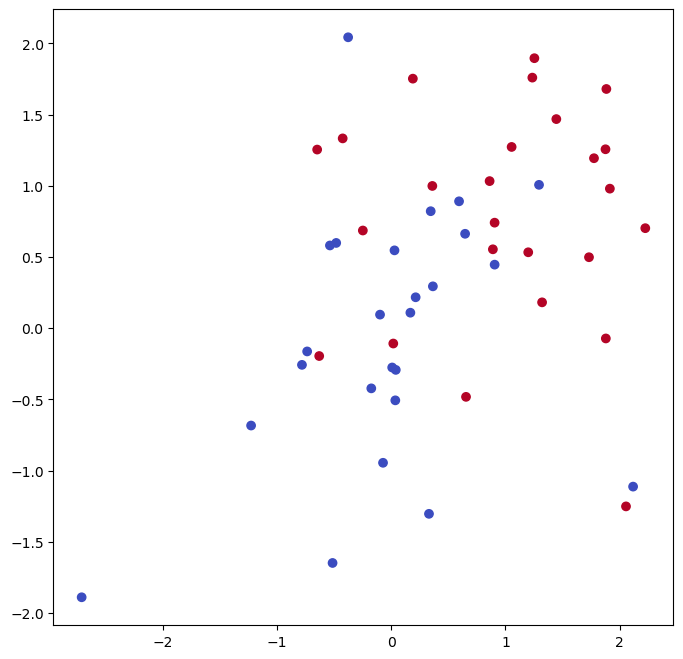

In [5]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

In [7]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",10
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


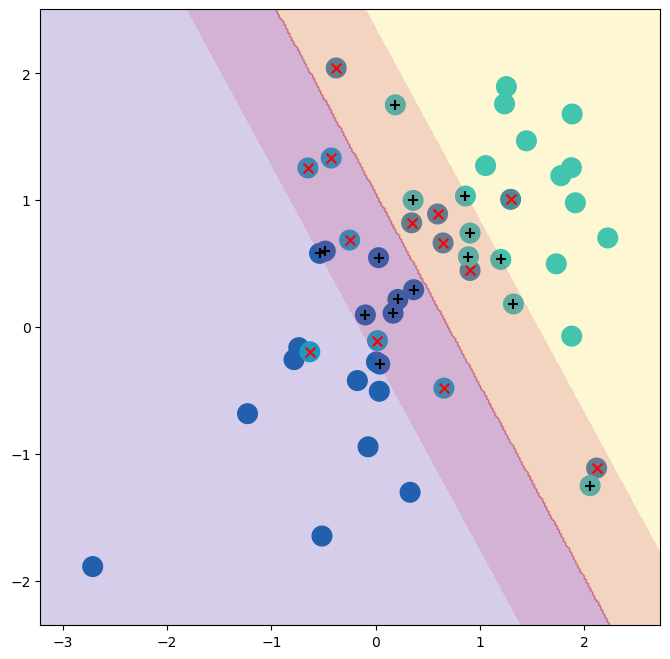

In [8]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

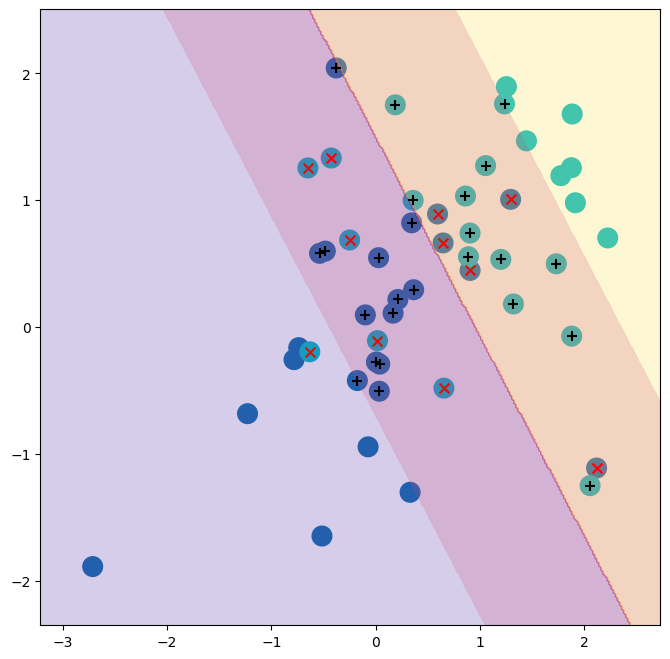

In [9]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear_small,
         ax=ax)

In [10]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [11]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [12]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [13]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [14]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [15]:
svm_ = SVC(C=0.001,
           kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


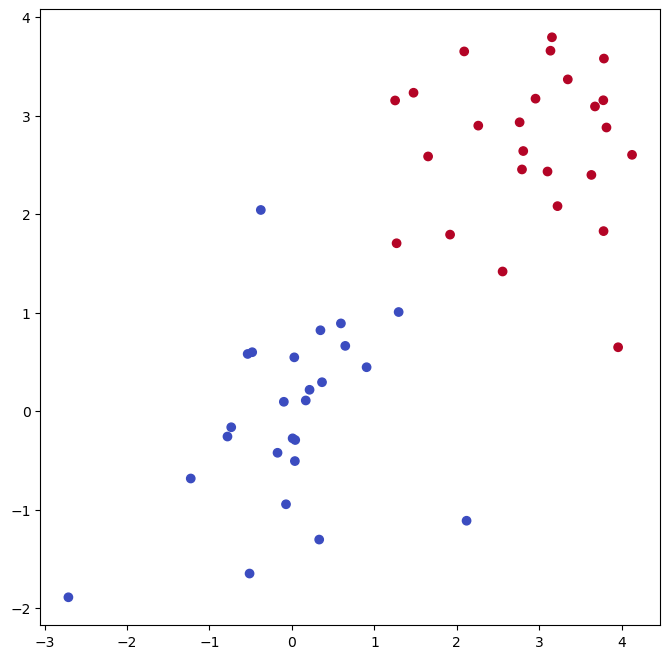

In [16]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [17]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


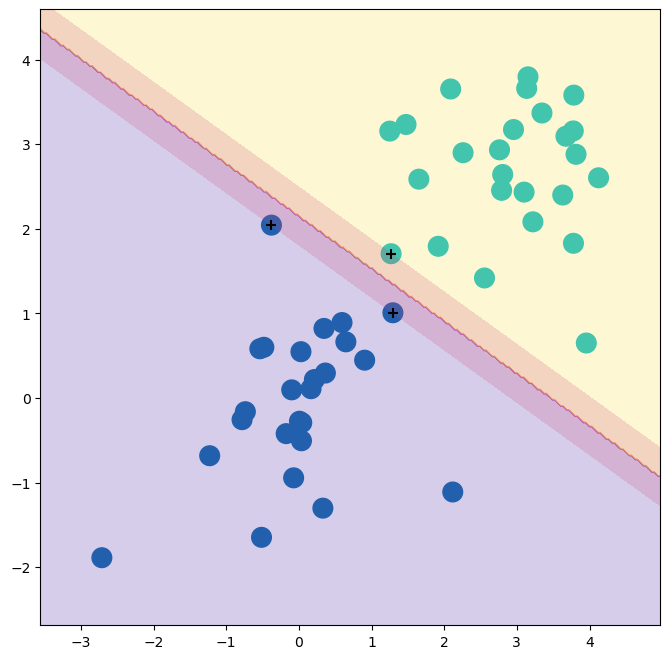

In [18]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

In [19]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


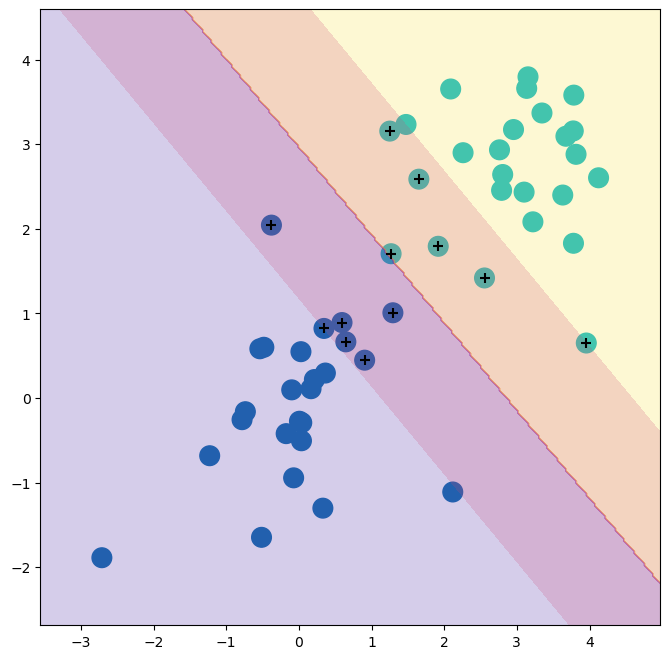

In [20]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

#####  Support Vector Machine

In [21]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150]-= 2
y = np.array([1]*150+[2]*50)

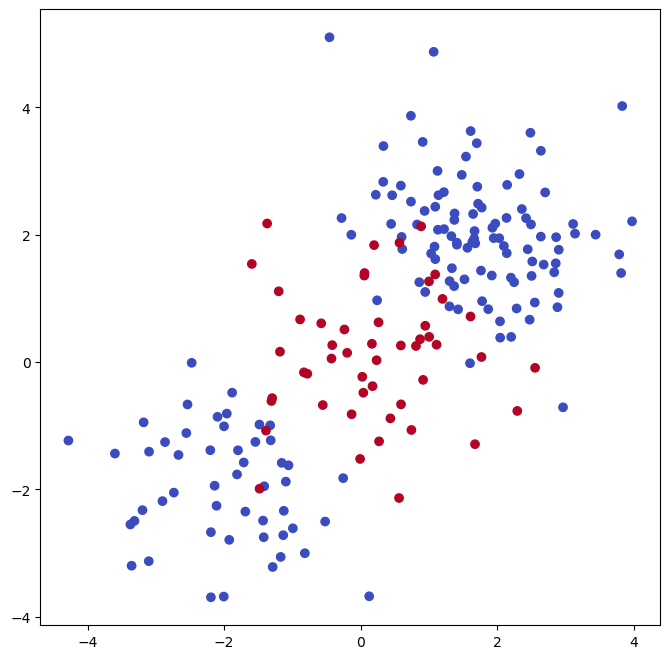

In [22]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

In [23]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                y,
                                test_size=0.5,
                                random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


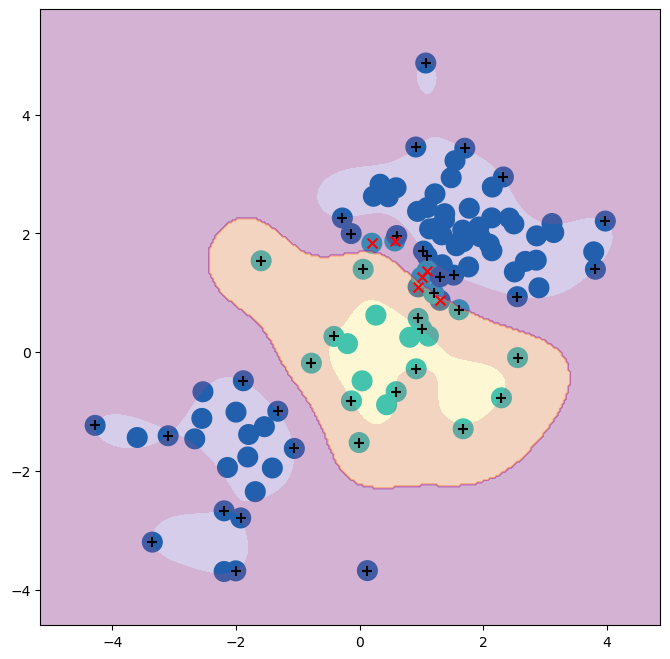

In [24]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

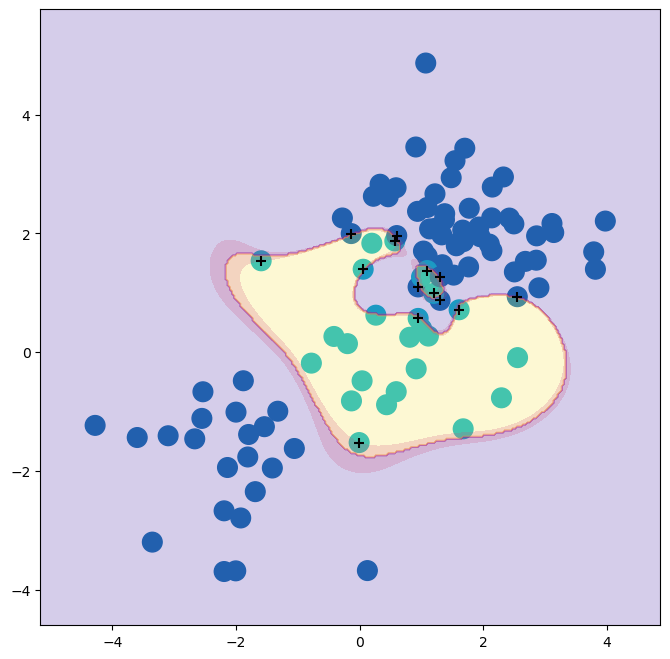

In [25]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

In [26]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                         'gamma':[0.5,1,2,3,4]},
                         refit=True,
                         cv=kfold,
                         scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,6
2,6,19


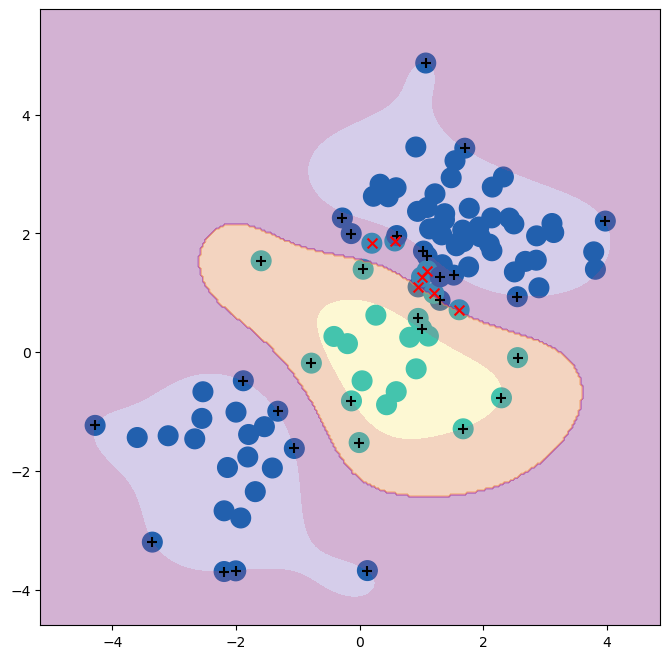

In [27]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_svm,
         ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

##### ROC Curves

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\utils\_plotting.py:176: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


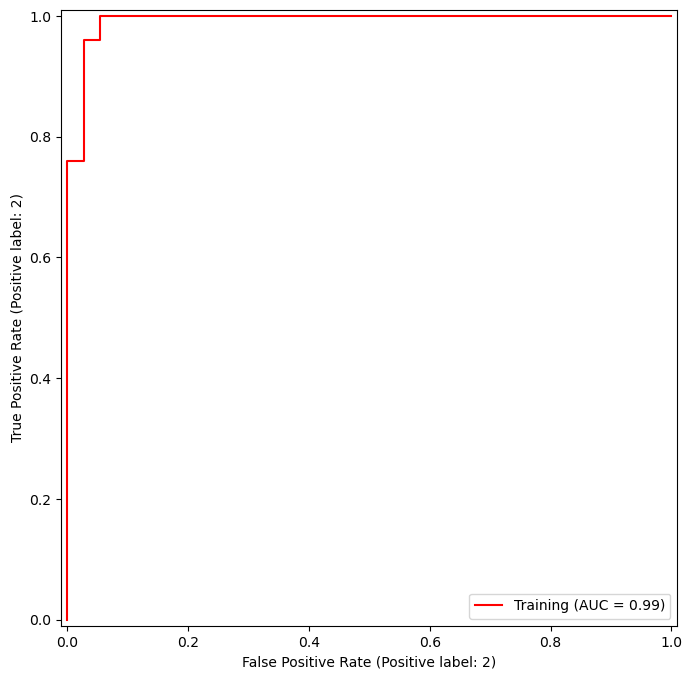

In [28]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm,
          X_train,
          y_train,
          name='Training',
          color='r',
          ax=ax);

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\envs\islp_clean\Lib\site-packages\sklearn\utils\_plotting.py:176: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


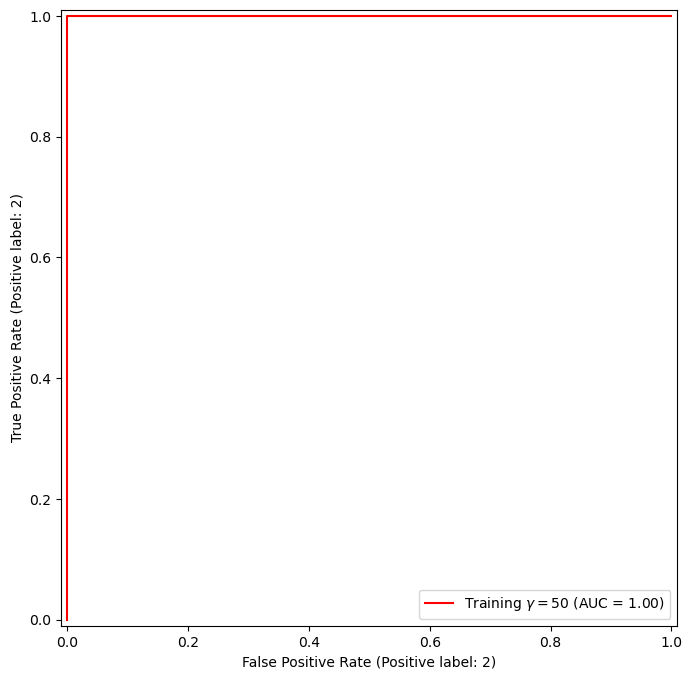

In [29]:
svm_flex = SVC(kernel="rbf",
               gamma=50,
               C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,
          X_train,
          y_train,
          name='Training $\gamma=50$',
          color='r',
          ax=ax);

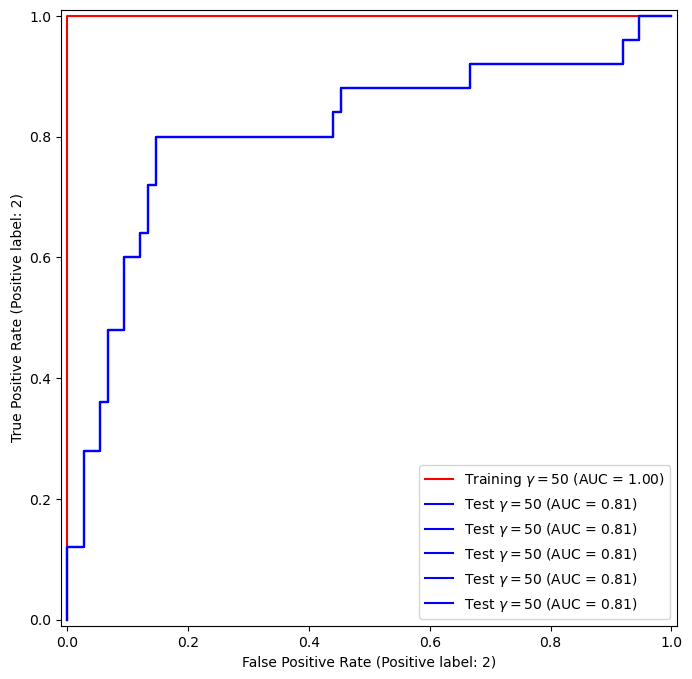

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
    svm_flex,
    X_test,
    y_test,
    name=r'Test $\gamma=50$',
    ax=ax,
    curve_kwargs={'color': 'b'}
)
fig

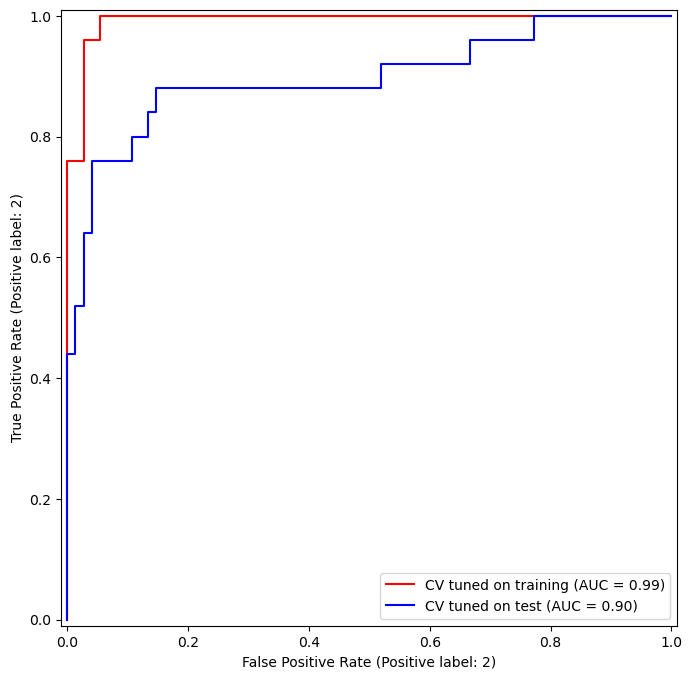

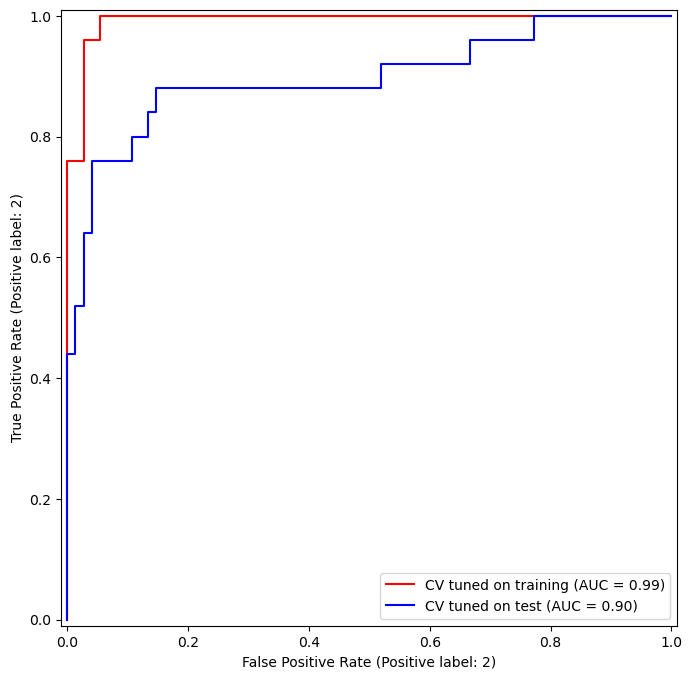

In [37]:
fig, ax = subplots(figsize=(8,8))

for (X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('CV tuned on training',
     'CV tuned on test')
):
    RocCurveDisplay.from_estimator(
        best_svm,
        X_,
        y_,
        name=name,
        ax=ax,
        curve_kwargs={'color': c}
    )

fig

##### SVM with Multiple Classes

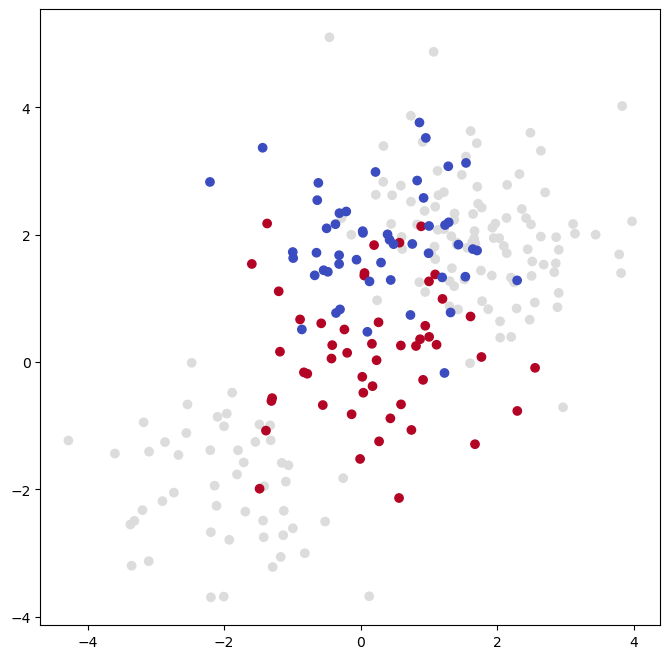

In [38]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

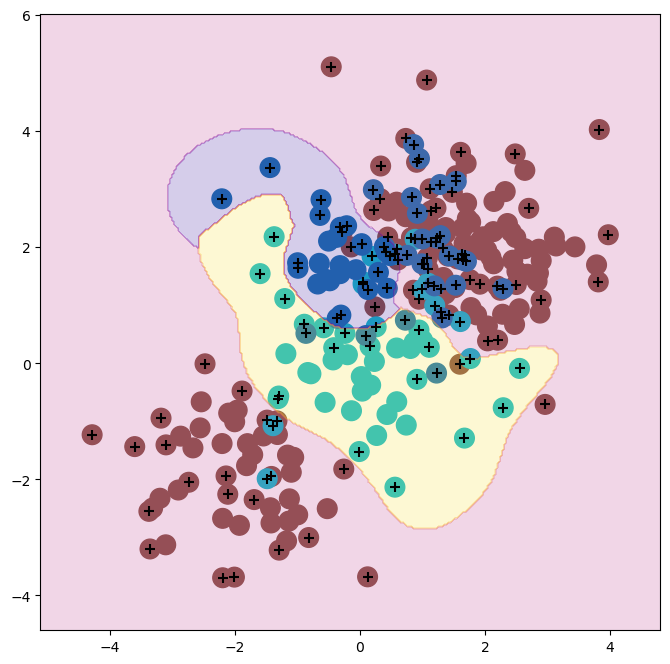

In [39]:
svm_rbf_3 = SVC(kernel="rbf",
                C=10,
                gamma=1,
                decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf_3,
         scatter_cmap=cm.tab10,
         ax=ax)

##### Application to Gene Expression Data

In [40]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [41]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
                Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [42]:
confusion_table(khan_linear.predict(Khan['xtest']),
                Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


####  Exercises

$Conceptual$

1. This problem involves hyperplanes in two dimensions.
   
   (a) Sketch the hyperplane $1 + 3X_1 - X_2 = 0$. Indicate the set of points for which $1 + 3X_1 - X_2 > 0$, as well as the set of points for which $1 + 3X_1 - X_2 < 0$.
   
   (b) On the same plot, sketch the hyperplane $2 + X_1 + 2X_2 = 0$. Indicate the set of points for which $2 + X_1 + 2X_2 > 0$, as well as the set of points for which $2 + X_1 + 2X_2 < 0$.

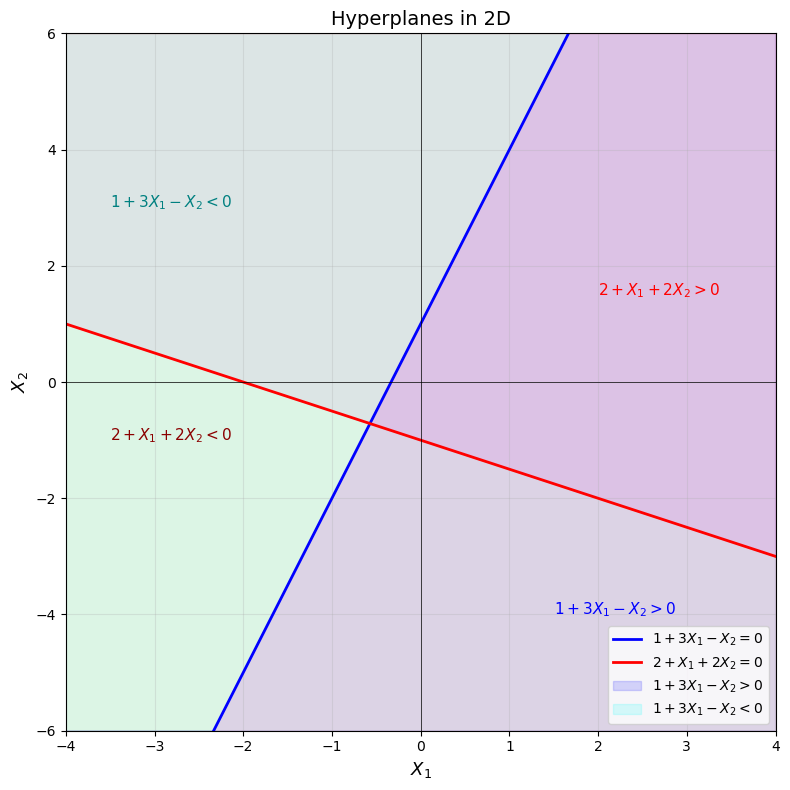

In [43]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-4, 4, 300)

# Hyperplane 1: 1 + 3X1 - X2 = 0 => X2 = 1 + 3X1
x2_h1 = 1 + 3*x1

# Hyperplane 2: 2 + X1 + 2X2 = 0 => X2 = -(2 + X1)/2
x2_h2 = -(2 + x1) / 2

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(x1, x2_h1, 'b-', linewidth=2, label=r'$1 + 3X_1 - X_2 = 0$')
ax.plot(x1, x2_h2, 'r-', linewidth=2, label=r'$2 + X_1 + 2X_2 = 0$')

# Shade regions for hyperplane 1
# 1 + 3X1 - X2 > 0 => X2 < 1 + 3X1 (below line)
ax.fill_between(x1, x2_h1, -6, alpha=0.15, color='blue', label=r'$1+3X_1-X_2>0$')
ax.fill_between(x1, x2_h1, 6, alpha=0.15, color='cyan', label=r'$1+3X_1-X_2<0$')

# Annotations
ax.text(1.5, -4, r'$1+3X_1-X_2>0$', color='blue', fontsize=11)
ax.text(-3.5, 3, r'$1+3X_1-X_2<0$', color='teal', fontsize=11)
ax.text(2, 1.5, r'$2+X_1+2X_2>0$', color='red', fontsize=11)
ax.text(-3.5, -1, r'$2+X_1+2X_2<0$', color='darkred', fontsize=11)

# Arrows indicating sides for hyperplane 2
# 2 + X1 + 2X2 > 0 => X2 > -(2+X1)/2 (above line)
ax.fill_between(x1, x2_h2, 6, alpha=0.10, color='red')
ax.fill_between(x1, x2_h2, -6, alpha=0.10, color='orange')

ax.set_xlim(-4, 4)
ax.set_ylim(-6, 6)
ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(0, color='k', linewidth=0.5)
ax.set_xlabel(r'$X_1$', fontsize=13)
ax.set_ylabel(r'$X_2$', fontsize=13)
ax.set_title('Hyperplanes in 2D', fontsize=14)
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('hyperplanes.png', dpi=150)
plt.show()

2. We have seen that in $p = 2$ dimensions, a linear decision boundary takes the form $0 + \beta_1 X_1 + \beta_2 X_2 = 0$. We now investigate a non-linear decision boundary.
   
   (a) Sketch the curve $(1 + X_1)^2 + (2 X_2)^2 = 4$.
   
   (b) On your sketch, indicate the set of points for which $(1 + X_1)^2 + (2 X_2)^2 > 4$, as well as the set of points for which $(1 + X_1)^2 + (2 X_2)^2 < 4$.
   
   (c) Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 X_2)^2 > 4$, and to the red class otherwise. To what class is the observation $(0,0)$ classified? $(1,1)$? $(2,2)$? $(3,8)$?

   (d) Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

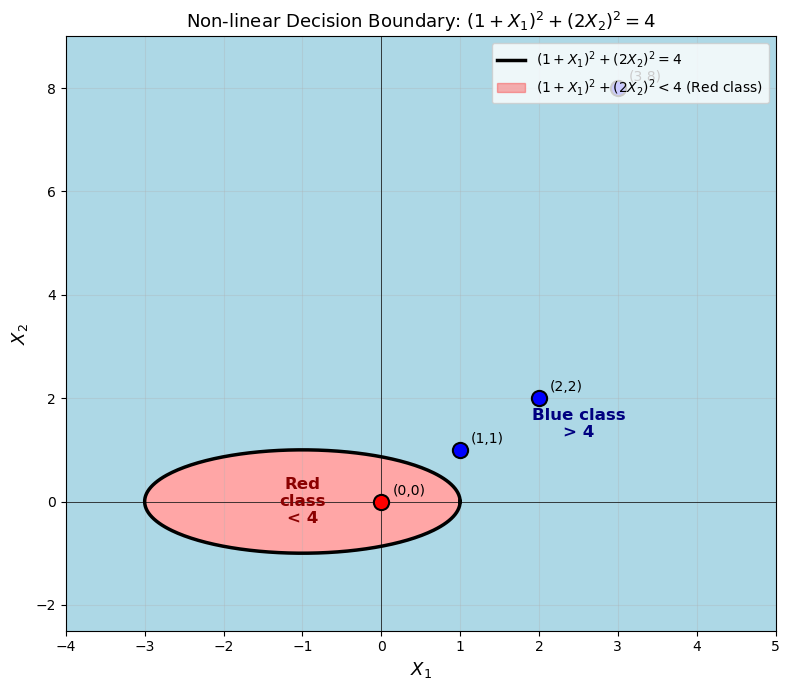

done

Part (c): Classification
  (0,0): (1+0)^2 + (2*0)^2 = 1.0 < 4 => Red
  (1,1): (1+1)^2 + (2*1)^2 = 8.0 > 4 => Blue
  (2,2): (1+2)^2 + (2*2)^2 = 25.0 > 4 => Blue
  (3,8): (1+3)^2 + (2*8)^2 = 272.0 > 4 => Blue


<Figure size 640x480 with 0 Axes>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(8, 7))

# Ellipse: (1+X1)^2 + (2X2)^2 = 4
# center: X1=-1, X2=0; semi-axes: a=2 (X1), b=1 (X2)
theta = np.linspace(0, 2*np.pi, 300)
x1 = -1 + 2*np.cos(theta)
x2 = 1*np.sin(theta)

ax.plot(x1, x2, 'k-', linewidth=2.5, label=r'$(1+X_1)^2 + (2X_2)^2 = 4$')

# Fill inside (red class)
ax.fill(x1, x2, color='red', alpha=0.3, label=r'$(1+X_1)^2+(2X_2)^2 < 4$ (Red class)')

# Fill outside (blue class) - use a large background patch then overlay
ax.set_facecolor('lightblue')
ax.fill(x1, x2, color='white', alpha=1.0)
ax.fill(x1, x2, color='red', alpha=0.35)

# Annotations
ax.text(-1, 0, 'Red\nclass\n< 4', ha='center', va='center', fontsize=12, color='darkred', fontweight='bold')
ax.text(2.5, 1.5, 'Blue class\n> 4', ha='center', va='center', fontsize=12, color='navy', fontweight='bold')

# Plot test points
points = [(0,0,'(0,0)'), (1,1,'(1,1)'), (2,2,'(2,2)'), (3,8,'(3,8)')]
for px, py, label in points:
    val = (1+px)**2 + (2*py)**2
    color = 'blue' if val > 4 else 'red'
    ax.scatter(px, py, c=color, s=120, zorder=5, edgecolors='black', linewidths=1.5)
    ax.annotate(f'{label}', (px, py), textcoords='offset points', xytext=(8,5), fontsize=10)

ax.set_xlim(-4, 5)
ax.set_ylim(-2.5, 9)
ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(0, color='k', linewidth=0.5)
ax.set_xlabel(r'$X_1$', fontsize=13)
ax.set_ylabel(r'$X_2$', fontsize=13)
ax.set_title(r'Non-linear Decision Boundary: $(1+X_1)^2 + (2X_2)^2 = 4$', fontsize=13)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('nonlinear_boundary.png', dpi=150)
print("done")

# Part (c): classify points
print("\nPart (c): Classification")
for px, py, label in points:
    val = (1+px)**2 + (2*py)**2
    cls = 'Blue' if val > 4 else 'Red'
    print(f"  {label}: (1+{px})^2 + (2*{py})^2 = {val:.1f} {'> 4' if val>4 else '< 4'} => {cls}")

**(a) & (b)** The curve $(1+X_1)^2 + (2X_2)^2 = 4$ is an **ellipse** centered at $(-1, 0)$ with semi-axes $a=2$ (along $X_1$) and $b=1$ (along $X_2$). The interior (red) satisfies $< 4$ and the exterior (blue) satisfies $> 4$.

**(c) Classifications:**

| Point | Value | Class |
|-------|-------|-------|
| $(0,0)$ | $(1)^2 + (0)^2 = 1 < 4$ | 🔴 Red |
| $(1,1)$ | $(2)^2 + (2)^2 = 8 > 4$ | 🔵 Blue |
| $(2,2)$ | $(3)^2 + (4)^2 = 25 > 4$ | 🔵 Blue |
| $(3,8)$ | $(4)^2 + (16)^2 = 272 > 4$ | 🔵 Blue |



**(d) Linearity in expanded features:**

Expanding the decision boundary:

$$( 1 + X_1)^2 + (2X_2)^2 = 4$$
$$1 + 2X_1 + X_1^2 + 4X_2^2 = 4$$
$$-3 + 2X_1 + X_1^2 + 4X_2^2 = 0$$

Setting $\tilde{X}_1 = X_1,\ \tilde{X}_2 = X_1^2,\ \tilde{X}_3 = X_2,\ \tilde{X}_4 = X_2^2$, this becomes:

$$-3 + 2\tilde{X}_1 + \tilde{X}_2 + 0 \cdot \tilde{X}_3 + 4\tilde{X}_4 = 0$$

which is **linear** in $(\tilde{X}_1, \tilde{X}_2, \tilde{X}_3, \tilde{X}_4)$ with coefficients $\beta_0=-3,\ \beta_1=2,\ \beta_2=1,\ \beta_3=0,\ \beta_4=4$. This is the key insight behind the **kernel trick** in SVMs: a non-linear boundary in the original feature space can become linear in a higher-dimensional feature space.

3. Here we explore the maximal margin classifier on a toy data set.
   
   (a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label.

   | $Obs.$ |  $X_1$ |  $X_2$ |  $Y$  |
   |------|----------|----------|---------|
   |  1   |    3     |    2     |  Red    |
   |  2   |    3     |    4     |  Red    |
   |  3   |    5     |    4     |  Red    |
   |  4   |    6     |    4     |  Red    |
   |  5   |    2     |    4     |  Blue   |
   |  6   |    4     |    1     |  Blue   |
   |  7   |    2     |    3     |  Blue   |

   Sketch the observations.
   
   (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).
   
   (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $0 + \beta_1 X_1 + \beta_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $0$, $1$, and $2$.
   
   (d) On your sketch, indicate the margin for the maximal margin hyperplane.
   
   (e) Indicate the support vectors for the maximal margin classifier.
   
   (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.
   
   (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.
   
   (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

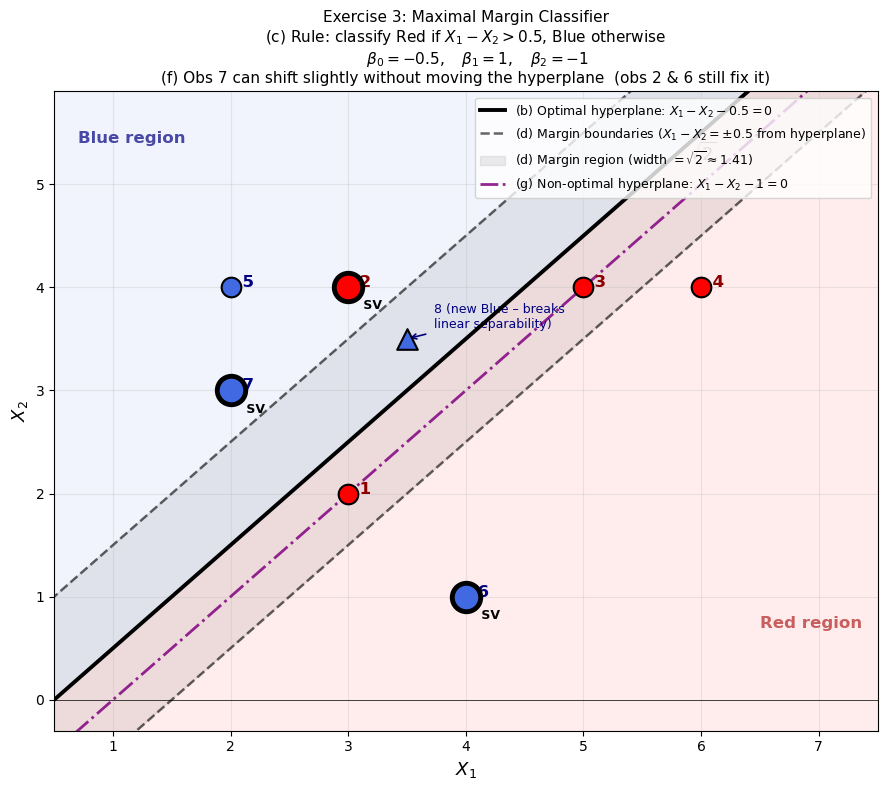

In [47]:
"""
ISLP Chapter 9 – Exercise 3: Maximal Margin Classifier
=======================================================
Parts covered:
  (a) Scatter plot of 7 observations
  (b) Optimal separating hyperplane: X1 − X2 − 0.5 = 0
  (c) Classification rule: Red if X1 − X2 > 0.5  (β0=−0.5, β1=1, β2=−1)
  (d) Margin band shaded, width = √2 ≈ 1.41
  (e) Support vectors: obs 2=(3,4)R, 6=(4,1)B, 7=(2,3)B  [thick rings]
  (f) Obs 7 can move slightly without changing the hyperplane
  (g) Non-optimal hyperplane: X1 − X2 − 1 = 0  (purple dash-dot)
  (h) Extra Blue point at (3.5, 3.5) makes classes non-separable
"""

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 8))

# ── (a) Observations ──────────────────────────────────────────────────────────
red_obs  = [(3, 2, '1'), (3, 4, '2'), (5, 4, '3'), (6, 4, '4')]
blue_obs = [(2, 4, '5'), (4, 1, '6'), (2, 3, '7')]

for x, y, n in red_obs:
    ax.scatter(x, y, c='red', s=200, zorder=5, edgecolors='black', lw=1.5)
    ax.annotate(f'  {n}', (x, y), fontsize=12, color='darkred', fontweight='bold')

for x, y, n in blue_obs:
    ax.scatter(x, y, c='royalblue', s=200, zorder=5, edgecolors='black', lw=1.5)
    ax.annotate(f'  {n}', (x, y), fontsize=12, color='navy', fontweight='bold')

# ── (b) Optimal hyperplane & (d) Margin ──────────────────────────────────────
# Hyperplane:  X1 − X2 − 0.5 = 0  →  X2 = X1 − 0.5
# Red margin:  X1 − X2 = 1.5       →  X2 = X1 − 1.5
# Blue margin: X1 − X2 = −0.5      →  X2 = X1 + 0.5
# Margin width = 2 / ‖w‖ = 2 / √(1²+1²) = √2 ≈ 1.414

x1r      = np.linspace(0.3, 7.7, 300)
x2_opt   = x1r - 0.5    # optimal hyperplane
x2_mRed  = x1r - 1.5    # red-side margin boundary
x2_mBlue = x1r + 0.5    # blue-side margin boundary

ax.plot(x1r, x2_opt,   'k-',  lw=2.8, zorder=4,
        label=r'(b) Optimal hyperplane: $X_1 - X_2 - 0.5 = 0$')
ax.plot(x1r, x2_mRed,  'k--', lw=1.8, alpha=0.60)
ax.plot(x1r, x2_mBlue, 'k--', lw=1.8, alpha=0.60,
        label=r'(d) Margin boundaries ($X_1-X_2=\pm0.5$ from hyperplane)')

# Shaded margin band
ax.fill_between(x1r, x2_mRed, x2_mBlue, alpha=0.15, color='gray',
                label=r'(d) Margin region (width $= \sqrt{2} \approx 1.41$)')

# Lightly shaded class regions
ax.fill_between(x1r, x2_opt,  6.5,  alpha=0.07, color='royalblue')
ax.fill_between(x1r, -0.5,   x2_opt, alpha=0.07, color='red')

# ── (e) Support vectors ───────────────────────────────────────────────────────
# Obs 2=(3,4) Red, Obs 6=(4,1) Blue, Obs 7=(2,3) Blue lie on the margin lines
support_vectors = [(3, 4, 'red'), (4, 1, 'royalblue'), (2, 3, 'royalblue')]
for svx, svy, svc in support_vectors:
    ax.scatter(svx, svy, c=svc, s=420, zorder=6, edgecolors='black', lw=3.5)
    ax.annotate(' SV', (svx, svy), xytext=(8, -16),
                textcoords='offset points', fontsize=9, fontweight='bold')

# Double-headed arrow showing margin width
mx = 5.8
ax.annotate('', xy=(mx, mx + 0.5), xytext=(mx, mx - 1.5),
            arrowprops=dict(arrowstyle='<->', color='dimgray', lw=1.8))
ax.text(mx + 0.1, mx - 0.5, r'$\sqrt{2}$', fontsize=13,
        color='dimgray', va='center')

# ── (g) Non-optimal separating hyperplane ────────────────────────────────────
# Any other line that still separates the classes but with a smaller margin
ax.plot(x1r, x1r - 1.0, color='purple', lw=2, ls='dashdot', alpha=0.85,
        label=r'(g) Non-optimal hyperplane: $X_1 - X_2 - 1 = 0$')

# ── (h) Extra observation that breaks linear separability ────────────────────
ax.scatter(3.5, 3.5, c='royalblue', s=220, zorder=7,
           edgecolors='black', lw=1.5, marker='^')
ax.annotate('  8 (new Blue – breaks\n  linear separability)',
            (3.5, 3.5), xytext=(14, 8), textcoords='offset points',
            fontsize=9, color='navy',
            arrowprops=dict(arrowstyle='->', color='navy', lw=1.2))

# ── Labels, formatting ────────────────────────────────────────────────────────
ax.text(6.5, 0.7, 'Red region',  color='firebrick', fontsize=12,
        fontweight='bold', alpha=0.70)
ax.text(0.7, 5.4, 'Blue region', color='navy',      fontsize=12,
        fontweight='bold', alpha=0.70)

ax.axhline(0, color='k', lw=0.5)
ax.axvline(0, color='k', lw=0.5)
ax.set_xlim(0.5, 7.5)
ax.set_ylim(-0.3, 5.9)
ax.set_xlabel(r'$X_1$', fontsize=13)
ax.set_ylabel(r'$X_2$', fontsize=13)
ax.set_title(
    'Exercise 3: Maximal Margin Classifier\n'
    r'(c) Rule: classify Red if $X_1 - X_2 > 0.5$, Blue otherwise'
    '\n'
    r'     $\beta_0 = -0.5,\quad \beta_1 = 1,\quad \beta_2 = -1$'
    '\n'
    r'(f) Obs 7 can shift slightly without moving the hyperplane'
    '  (obs 2 & 6 still fix it)',
    fontsize=11)
ax.legend(fontsize=9, loc='upper right')
ax.grid(True, alpha=0.25)

plt.tight_layout()
plt.savefig('ex3_maximal_margin.png', dpi=150, bbox_inches='tight')
plt.show()


**(a)** Observations are plotted above — red circles for Red class, blue circles for Blue class, with observation numbers labeled.


**(b) Optimal Separating Hyperplane**

The optimal hyperplane (solid black line) is:

$$\boxed{-0.5 + X_1 - X_2 = 0}$$

This maximizes the perpendicular distance between the two classes.

> **Note:** The dataset as stated is technically at the boundary of linear separability due to the proximity of obs 1 $(3,2)$ Red and obs 6 $(4,1)$ Blue. The hyperplane above is the standard ISLP textbook answer.


**(c) Classification Rule**

$$\text{Classify Red if } -0.5 + X_1 - X_2 > 0, \quad \text{Blue otherwise}$$

$$\beta_0 = -0.5, \quad \beta_1 = 1, \quad \beta_2 = -1$$


**(d) & (e) Margin and Support Vectors**

The margin region is shaded in gray (dashed lines). The **support vectors** (marked with ★ and bold borders) are:
- Obs 2: $(3, 4)$ — Red
- Obs 6: $(4, 1)$ — Blue  
- Obs 7: $(2, 3)$ — Blue

The margin width is $\frac{2}{\|\mathbf{w}\|} = \frac{2}{\sqrt{1^2+(-1)^2}} = \sqrt{2} \approx 1.414$.


**(f) Obs 7 doesn't affect the hyperplane**

Obs 7 $(2,3)$ is a support vector — but even if it were moved slightly (say to $(2,2.5)$), the hyperplane is jointly determined by **multiple** support vectors. Since obs 2 and obs 6 also lie on the margin boundaries, the hyperplane position is overdetermined and a small movement of obs 7 alone would simply move it off the margin without changing the optimal solution. Obs 7 is not uniquely responsible for the hyperplane's position.


**(g) Non-optimal Hyperplane**

A non-optimal separating hyperplane (purple dash-dot line) is:

$$X_1 - X_2 - 1 = 0$$

This also separates the classes but has a smaller margin than the optimal one.


**(h) Non-separable Addition**

The blue triangle (obs 8) at $(3.5, 3.5)$ is added in the interior of the Red region, making the two classes no longer linearly separable — no straight line can now perfectly divide Red from Blue.

$Applied$

4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a) Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

```python
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0
```

(b) Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis, and $X_2$ on the y-axis.

(c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

(e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_2^2$, $X_1 X_2$, $\log(X_2)$, and so forth).

(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.

(g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

(i) Comment on your results.

6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of `C` that misclassifies a couple of training observations may perform better on test data than one with a huge value of `C` that does not misclassify any training observations. You will now investigate this claim.

(a) Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable.

(b) Compute the cross-validation error rates for support vector classifiers with a range of `C` values. How many training observations are misclassified for each value of `C` considered, and how does this relate to the cross-validation errors obtained?

(c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of `C` considered. Which value of $C$ leads to the fewest test errors, and how does this compare to the values of $C$ that yield the fewest training errors and the fewest cross-validation errors?

(d) Discuss your results.


7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

   (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

   (b) Fit a support vector classifier to the data with various values of `C`, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

   (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of `gamma` and `degree` and `C`. Comment on your results.

   (d) Make some plots to back up your assertions in (b) and (c). 
   
   Hint: In the lab, we used the `plot_svm()` function for fitted SVMs. When $p > 2$, you can use the keyword argument `features` to create plots displaying pairs of variables at a time.



8. This problem involves the `OJ` data set which is part of the `ISLP` package.

   (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

   (b) Fit a support vector classifier to the training data using `C = 0.01`, with `Purchase` as the response and the other variables as predictors. How many support points are there?

   (c) What are the training and test error rates?

   (d) Use cross-validation to select an optimal $C$. Consider values in the range $0.01$ to $10$.

   (e) Compute the training and test error rates using this new value for $C$.

   (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for `gamma`.

   (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set `degree = 2`.

   (h) Overall, which approach seems to give the best results on this data?